In [4]:
import pandas as pd

# Load the data
solar_wind_data = pd.read_csv('C:\\Users\\shahi\\OneDrive\\Desktop\\Fatema_NASA\\solar_wind.csv')
solar_flare_data = pd.read_csv('C:\\Users\\shahi\\OneDrive\\Desktop\\Fatema_NASA\\Solar_flare_RHESSI_2004_05.csv')
cme_data = pd.read_csv(r'C:\Users\shahi\OneDrive\Desktop\Fatema_NASA\CME_data_samples\normalized_testing_12.csv')


# Print column names to check if 'Timestamp' exists
print(solar_wind_data.columns)
print(solar_flare_data.columns)
print(cme_data.columns)


Index(['period', 'timedelta', 'bx_gse', 'by_gse', 'bz_gse', 'theta_gse',
       'phi_gse', 'bx_gsm', 'by_gsm', 'bz_gsm', 'theta_gsm', 'phi_gsm', 'bt',
       'density', 'speed', 'temperature', 'source'],
      dtype='object')
Index(['duration.s', 'peak.c/s', 'total.counts', 'energy.kev', 'x.pos.asec',
       'y.pos.asec', 'radial', 'active.region.ar', 'flag.1', 'flag.2',
       'flag.3', 'flag.4', 'flag.5', 'dt.start', 'dt.peak', 'dt.end', 'year',
       'month', 'day', 'energy.kev.i', 'energy.kev.f'],
      dtype='object')
Index(['Label', 'Timestamp', 'NOAA_AR_NUM', 'HARP_NUM', 'TOTUSJH', 'TOTPOT',
       'TOTUSJZ', 'ABSNJZH', 'SAVNCPP', 'USFLUX', 'AREA_ACR', 'MEANPOT',
       'R_VALUE', 'SHRGT45', 'MEANGAM', 'MEANJZH', 'MEANGBT', 'MEANGBZ',
       'MEANJZD', 'MEANGBH', 'MEANSHR', 'MEANALP'],
      dtype='object')


In [7]:
import pandas as pd

# Load the data
solar_wind_data = pd.read_csv('C:\\Users\\shahi\\OneDrive\\Desktop\\Fatema_NASA\\solar_wind.csv')
solar_flare_data = pd.read_csv('C:\\Users\\shahi\\OneDrive\\Desktop\\Fatema_NASA\\Solar_flare_RHESSI_2004_05.csv')
cme_data = pd.read_csv(r'C:\Users\shahi\OneDrive\Desktop\Fatema_NASA\CME_data_samples\normalized_testing_12.csv')


# Replace 'T' with 'min'
solar_wind_data['Timestamp'] = pd.date_range(start='2004-01-01', periods=len(solar_wind_data), freq='min')
solar_flare_data['Timestamp'] = pd.date_range(start='2004-01-01', periods=len(solar_flare_data), freq='min')

# Convert Timestamp columns to datetime
solar_wind_data['Timestamp'] = pd.to_datetime(solar_wind_data['Timestamp'])
solar_flare_data['Timestamp'] = pd.to_datetime(solar_flare_data['Timestamp'])
cme_data['Timestamp'] = pd.to_datetime(cme_data['Timestamp'], utc=True)  # Ensure timezone awareness

# Convert timezone-aware timestamps to naive (if necessary)
cme_data['Timestamp'] = cme_data['Timestamp'].dt.tz_localize(None)

# Merge datasets on Timestamp
merged_data = pd.merge(solar_wind_data, solar_flare_data, on='Timestamp', how='outer')
merged_data = pd.merge(merged_data, cme_data, on='Timestamp', how='outer')

# Check the structure of the merged data
print(merged_data.head())
print(merged_data.info())


    period        timedelta  bx_gse  by_gse  bz_gse  theta_gse  phi_gse  \
0  train_a  0 days 00:00:00   -5.55    3.00    1.25      11.09   153.37   
1  train_a  0 days 00:01:00   -5.58    3.16    1.17      10.10   151.91   
2  train_a  0 days 00:02:00   -5.15    3.66    0.85       7.87   146.04   
3  train_a  0 days 00:03:00   -5.20    3.68    0.68       6.17   146.17   
4  train_a  0 days 00:04:00   -5.12    3.68    0.49       4.62   145.72   

   bx_gsm  by_gsm  bz_gsm  ...  R_VALUE  SHRGT45  MEANGAM  MEANJZH  MEANGBT  \
0   -5.55    3.00    1.25  ...      NaN      NaN      NaN      NaN      NaN   
1   -5.58    3.16    1.17  ...      NaN      NaN      NaN      NaN      NaN   
2   -5.15    3.66    0.85  ...      NaN      NaN      NaN      NaN      NaN   
3   -5.20    3.68    0.68  ...      NaN      NaN      NaN      NaN      NaN   
4   -5.12    3.68    0.49  ...      NaN      NaN      NaN      NaN      NaN   

   MEANGBZ MEANJZD MEANGBH  MEANSHR  MEANALP  
0      NaN     NaN     NaN 

In [8]:
# Check for missing values
print(merged_data.isna().sum())


period                 1312
timedelta              1312
bx_gse               327200
by_gse               327200
bz_gse               327200
theta_gse            327200
phi_gse              327700
bx_gsm               327200
by_gsm               327200
bz_gsm               327200
theta_gsm            327200
phi_gsm              327700
bt                   327200
density              686202
speed                690867
temperature          813080
source               318128
Timestamp                 0
duration.s          8376126
peak.c/s            8376126
total.counts        8376126
energy.kev          8376126
x.pos.asec          8376126
y.pos.asec          8376126
radial              8376126
active.region.ar    8376126
flag.1              8376126
flag.2              8376126
flag.3              8380231
flag.4              8380264
flag.5              8386894
dt.start            8376126
dt.peak             8376126
dt.end              8376126
year                8376126
month               

In [9]:
# List columns to drop due to excessive missing values
columns_to_drop = [
    'energy.kev', 'flag.1', 'flag.2', 'flag.3', 'flag.4', 'flag.5',
    'dt.start', 'dt.peak', 'dt.end', 'year', 'month', 'day',
    'energy.kev.i', 'energy.kev.f'
]

# Drop columns with excessive missing values
merged_data = merged_data.drop(columns=columns_to_drop)


In [11]:
from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
numerical_cols = merged_data.select_dtypes(include=['float64']).columns
categorical_cols = merged_data.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns with the median
num_imputer = SimpleImputer(strategy='median')
merged_data[numerical_cols] = num_imputer.fit_transform(merged_data[numerical_cols])

# Impute missing values for categorical columns with the mode
cat_imputer = SimpleImputer(strategy='most_frequent')
merged_data[categorical_cols] = cat_imputer.fit_transform(merged_data[categorical_cols])


In [12]:
from sklearn.preprocessing import LabelEncoder

# Example: Encoding 'Label' column
label_encoder = LabelEncoder()
merged_data['Label'] = label_encoder.fit_transform(merged_data['Label'])

# One-hot encode other categorical columns if needed
merged_data = pd.get_dummies(merged_data, columns=['source'])


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = merged_data.select_dtypes(include=['float64']).columns
merged_data[numerical_cols] = scaler.fit_transform(merged_data[numerical_cols])


In [14]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = merged_data.drop('Label', axis=1)
y = merged_data['Label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Check for non-numeric columns
non_numeric_cols = merged_data.select_dtypes(exclude=['float64', 'int64', 'datetime64']).columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index(['period', 'timedelta', 'source_ac', 'source_ds'], dtype='object')


In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for col in ['period', 'source_ac', 'source_ds']:
    merged_data[col] = label_encoder.fit_transform(merged_data[col])


In [18]:
# Convert 'timedelta' to total seconds
merged_data['timedelta'] = pd.to_timedelta(merged_data['timedelta']).dt.total_seconds()


In [19]:
# Convert any remaining non-numeric columns to numeric, forcing errors to NaN
merged_data = merged_data.apply(pd.to_numeric, errors='coerce')


In [23]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Define file paths
files = ['C:\\Users\\shahi\\OneDrive\\Desktop\\Fatema_NASA\\solar_wind.csv', 'C:\\Users\\shahi\\OneDrive\\Desktop\\Fatema_NASA\\Solar_flare_RHESSI_2004_05.csv', r'C:\Users\shahi\OneDrive\Desktop\Fatema_NASA\CME_data_samples\normalized_testing_12.csv']

# Initialize imputers and encoders
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')
le = LabelEncoder()

# Process and combine chunks
def process_file(file_path):
    chunk_size = 100000  # Adjust based on available memory
    chunks = pd.read_csv(file_path, chunksize=chunk_size)
    
    processed_chunks = []
    
    for chunk in chunks:
        # Handle missing values for numerical columns
        numerical_cols = chunk.select_dtypes(include=['float64', 'int64']).columns
        chunk[numerical_cols] = num_imputer.fit_transform(chunk[numerical_cols])
        
        # Handle missing values for categorical columns
        categorical_cols = chunk.select_dtypes(include=['object']).columns
        if categorical_cols.size > 0:
            chunk[categorical_cols] = cat_imputer.fit_transform(chunk[categorical_cols])
        
        # Encode categorical columns
        for col in categorical_cols:
            chunk[col] = le.fit_transform(chunk[col])
        
        # Add the processed chunk to the list
        processed_chunks.append(chunk)
    
    # Combine all chunks into a single DataFrame
    final_data = pd.concat(processed_chunks, ignore_index=True)
    return final_data

# Process each file and combine the results
all_data = pd.concat([process_file(file) for file in files], ignore_index=True)




In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target variable
X = merged_data.drop('Label', axis=1)
y = merged_data['Label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9999994043105281
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1678618
           1       1.00      0.99      1.00       109

    accuracy                           1.00   1678727
   macro avg       1.00      1.00      1.00   1678727
weighted avg       1.00      1.00      1.00   1678727



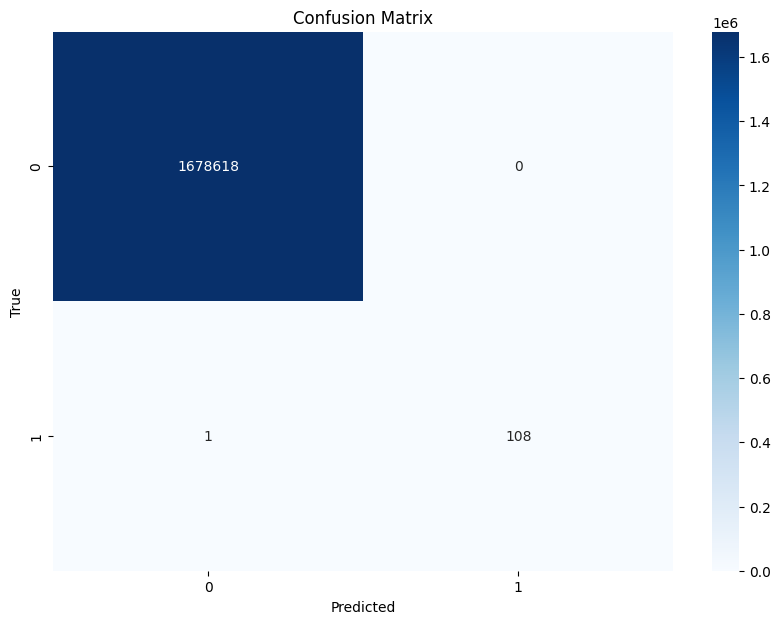

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


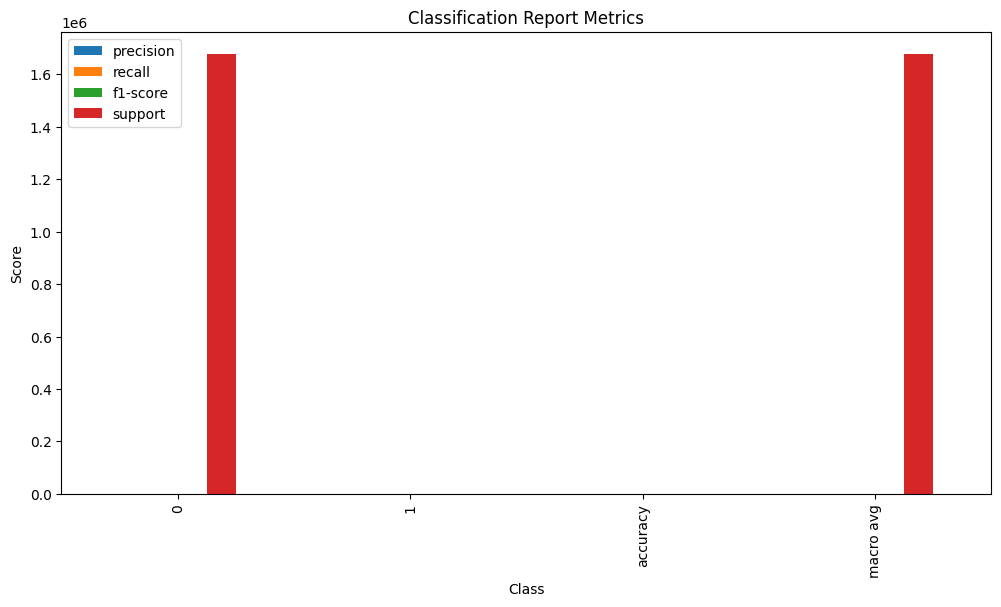

In [26]:
import pandas as pd

# Create a DataFrame from the classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot the classification report
report_df[:-1].plot(kind='bar', figsize=(12, 6))
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Classification Report Metrics')
plt.legend(loc='best')
plt.show()


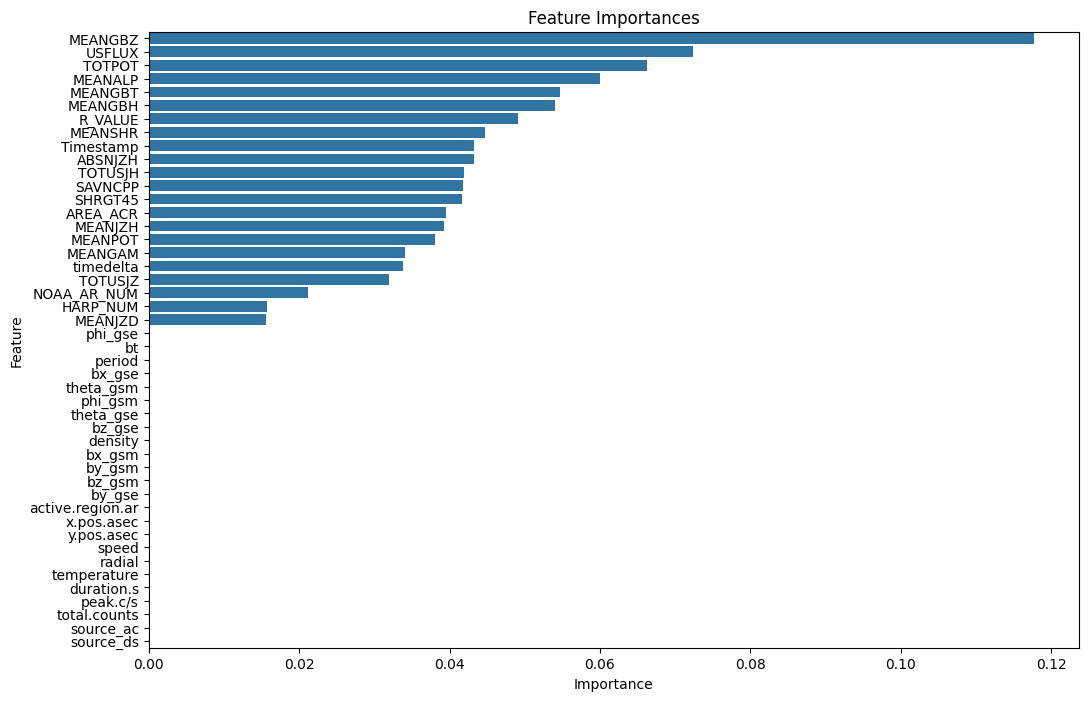

In [27]:
# Compute feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()
